c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


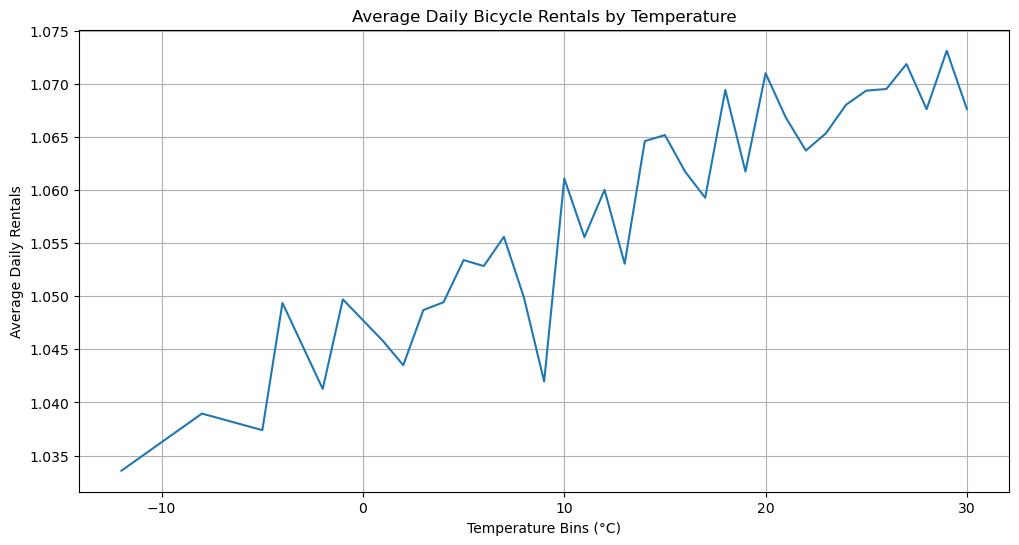

대여량이 급격히 줄어드는 기온 임계값은 10.0도 입니다.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
temperature_data = pd.read_csv('C:/Users/evol0/OneDrive/바탕 화면/따릉이2/기온.csv', encoding='cp949')  # 일평균기온 데이터 파일
bicycle_data = pd.read_csv('C:/Users/evol0/OneDrive/바탕 화면/따릉이2/일별따릉이데이터.csv')  # 일 따릉이 대여량 데이터 파일

# 날짜 기준으로 데이터 병합 (날짜 형식이 일치해야 함)
merged_data = pd.merge(temperature_data, bicycle_data, on='기준_날짜')

# 기온에 따른 대여량의 시각화를 위한 데이터 정리
# 기온을 정수형으로 반올림하여 각 기온별 평균 대여량 계산
merged_data['rounded_temp'] = merged_data['평균기온(°C)'].round()  # 기온을 반올림
average_rentals_by_temp = merged_data.groupby('rounded_temp')['전체_건수'].mean()

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_rentals_by_temp.index, y=average_rentals_by_temp.values)
plt.title('Average Daily Bicycle Rentals by Temperature')
plt.xlabel('Temperature Bins (°C)')
plt.ylabel('Average Daily Rentals')
plt.grid(True)
plt.show()

# 대여량이 급격하게 줄어드는 기온 찾기
# 예를 들어, 기온 변화에 따른 대여량의 변화율을 계산하여 급격한 변화가 있는 지점 찾기
change_rates = average_rentals_by_temp.diff().abs()  # 변화율 계산
threshold_temp = change_rates.idxmax()  # 가장 큰 변화가 있는 기온

print(f"대여량이 급격히 줄어드는 기온 임계값은 {threshold_temp}도 입니다.")